In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
import os
from datetime import datetime
%matplotlib inline

In [2]:
def display_image(image):
    
    plt.figure(figsize = (8,8))
    plt.imshow(image)
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show()
    
def convert_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Basics

Encode :  128
Face Loc :  (139, 304, 325, 118)

Encode Test:  128
Face Loc Test :  (81, 425, 236, 270)

FaceDis :  [0.30471351]
Results :  [True]


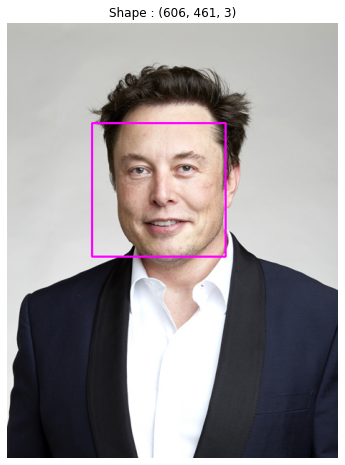

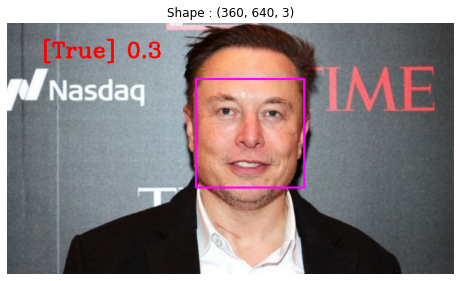

In [3]:
elon_path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesBasic/Elon.jpeg"
elon_test_path ="/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesBasic/elon_test.jpeg"

imgElon = face_recognition.load_image_file(elon_path)
imgElon = cv2.cvtColor(imgElon, cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file(elon_test_path)
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeElonTest = face_recognition.face_encodings(imgTest)[0]

print("Encode : ",len(encodeElon))
print("Face Loc : ", faceLoc)
print()
print("Encode Test: ",len(encodeElonTest))
print("Face Loc Test : ", faceLocTest)

cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

results = face_recognition.compare_faces([encodeElon],encodeElonTest)
faceDis = face_recognition.face_distance([encodeElon],encodeElonTest)

cv2.putText(imgTest,f"{results} {round(faceDis[0],2)}",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

print()
print("FaceDis : ",faceDis)
print("Results : ", results)


display_image(convert_rgb(imgElon))
display_image(convert_rgb(imgTest))

In [5]:
elon_path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesBasic/Elon.jpeg"
elon_test_path ="/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesBasic/elon_test.jpeg"

imgElon = face_recognition.load_image_file(elon_path)
imgElon = cv2.cvtColor(imgElon, cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file(elon_test_path)
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgElon)
encodeElon = face_recognition.face_encodings(imgElon,faceLoc)
len(encodeElon[0])

128

## Attendance

In [6]:
path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesAttendance"
images = []
classNames = []
myList = os.listdir(path)
for cls in myList:
    curImg = cv2.imread(f"{path}/{cls}")
    images.append(curImg)
    classNames.append(os.path.splitext(cls)[0])

images.pop(-1)
myList.pop(-1)
classNames.pop(-1)

print("My List : ",myList )
print("Class Names : ", classNames)

def findEncodings(images):
    encodeList = []
    for img in images:
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(image)[0]
        encodeList.append(encode)
    return encodeList


class FileManager():            
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
                  
    def __enter__(self):
        self.file = open(self.filename, self.mode)
        return self.file
       
    def __exit__(self, exc_type, exc_value, traceback):
        self.file.close()

def markAttendance(name):
    
    with FileManager("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/attendance.txt","r+") as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(",")
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime("%H:%M:%S")
            f.writelines(f"\n{name},{dtString}")

        
encodeListKnown = findEncodings(images)
print("EncodeList : ", len(encodeListKnown))


cap = cv2.VideoCapture(0)

while True:
    
    conn,frame = cap.read()
    imgS = cv2.resize(frame,(0,0),None,.25,.25)
    imgS = cv2.cvtColor(imgS,cv2.COLOR_BGR2RGB)
    
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
    
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            #print(name)
            y1,x2,y2,x1 = faceLoc
            # Neden çümkü scale düşürdük !!!
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(frame,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(frame,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)
            
    cv2.imshow("Webcam",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

My List :  ['Jackma.jpeg', 'Elon.jpeg', 'Billgates.jpeg']
Class Names :  ['Jackma', 'Elon', 'Billgates']
EncodeList :  3
